# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# it will display all matplotlib graph inside jupyter notebook
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_bf_test= pd.read_csv("D:\Study\Data Science\Dataset\Black Friday\\blackFriday_test.csv")
df_bf_test.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN


In [7]:
df_bf_test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [9]:
df_bf_test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [5]:
df_bf_train= pd.read_csv("D:\Study\Data Science\Dataset\Black Friday\\blackFriday_train.csv")
df_bf_train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [11]:
df_bf_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [12]:
df_bf_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
#Merge Train and Test data on User_id
df_bf_final = df_bf_train.append(df_bf_test)
df_bf_final.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0


In [14]:
df_bf_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [15]:
df_bf_final.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
# In final dataset we do see that User_ID is of no use and we can delete it
df_bf_final.drop('User_ID',axis=1, inplace= True)
df_bf_final

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [17]:
df_bf_final.groupby(['Marital_Status']).size().reset_index().rename(columns={0:'Count of Marital Status'})

,Marital_Status,Count of Marital Status
0,0,462538
1,1,321129


# Feature Engineering

# Step 1: Handling Categorical Variable Gender by ENCODING METHOD

In [9]:
# We will do analysis of Gender Column to see the count
df_bf_final.groupby(['Gender']).size().reset_index().rename(columns={0:'Count of Gender'})

,Gender,Count of Gender
0,F,193636
1,M,590031


In [8]:
#For better Handling we we will convert Gender values from F and M to 0 and 1 respectively
df_bf_final['Gender']= df_bf_final['Gender'].map({'F':0,'M':1})
df_bf_final.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [20]:
df_bf_final.groupby(['Gender']).size().reset_index().rename(columns={0:'Count of Gender'})

,Gender,Count of Gender
0,0,193636
1,1,590031


# Step 2: Handling Age 

In [66]:
# We will do analysis of Age Column to see the count
df_bf_final.groupby(['Age']).size().reset_index().rename(columns={0:'Count of Age'})

,Age,Count of Age
0,0-17,21334
1,18-25,141953
2,26-35,313015
3,36-45,156724
4,46-50,65278
5,51-55,54784
6,55+,30579


In [37]:
#we can drop the first column if we do not see any values in keeping it.
#But we will not do this operation
# pd.get_dummies(df_bf_final['Age'],drop_first=True)

,18-25,26-35,36-45,46-50,51-55,55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
233594,0,1,0,0,0,0
233595,0,1,0,0,0,0
233596,0,1,0,0,0,0
233597,0,0,0,1,0,0


In [60]:
# we can use below label encoding 
# but not this time as i want to go ahead with my label encoding

from sklearn import preprocessing
#label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()

#Encode labels in column 'species'

df_bf_final['Age'] = label_encoder.fit_transform(df_bf_final['Age'])
df_bf_final['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [9]:
#For better Handling we we will convert Age group values to some variables

df_bf_final['Age']= df_bf_final['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df_bf_final.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [68]:
# We will do analysis of Age Column to see the count
df_bf_final.groupby(['Age']).size().reset_index().rename(columns={0:'Count of Age'})

,Age,Count of Age
0,1,21334
1,2,141953
2,3,313015
3,4,156724
4,5,65278
5,6,54784
6,7,30579


# Step3: Handling City Category
1. Based on different values we will add the values of City Category as columns
2. Change the datatype of newly added City Category to INT64

In [10]:
df_city= pd.get_dummies(df_bf_final['City_Category'],drop_first=True)
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [11]:
df_bf_final = pd.concat([df_bf_final,df_city],axis=1)
df_bf_final

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN,0,1


In [12]:
#now we do  need City Category as we have encoded it into B and C columns
df_bf_final.drop('City_Category', axis=1,inplace=True)
df_bf_final

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,0,1


In [13]:
# Change datatype of Column Name B and C to Numeric
df_bf_final['B'] = df_bf_final['B'].astype('int64')
df_bf_final['C'] = df_bf_final['C'].astype('int64')
df_bf_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 77.7+ MB


# Handling Missing Values

In [77]:
#first check the count of missing values for each columns
df_bf_final.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [43]:
#Observation : Product_Category2 and Product Category 3 has maximum count of Null Values which needs to be replaced

In [73]:
# we will check the different values and their count for  Product_Category2 
df_bf_final['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [74]:
# We see that 8.0 is repeated maximum time for Product_Category2 which can be verified by using Mode function
df_bf_final['Product_Category_2'].mode()[0]

8.0

In [14]:
# We will replace Product_Category_2 null values with maximum repeated value,which is Mode function
df_bf_final['Product_Category_2']= df_bf_final['Product_Category_2'].fillna(df_bf_final['Product_Category_2'].mode()[0])

In [81]:
# We see that 16.0 is repeated maximum time for 'Product_Category_3' which can be verified by using Mode function
df_bf_final['Product_Category_3'].mode()[0]

16.0

In [15]:
# We will replace Product_Category_3 null values with maximum repeated value,which is Mode function
df_bf_final['Product_Category_3']= df_bf_final['Product_Category_3'].fillna(df_bf_final['Product_Category_3'].mode()[0])

In [16]:
# Now we can check the count of missing values for product_Category2 and product_Category3
# which can be seen its no longer there
df_bf_final.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

# Stay_in_Current_City_Years


In [84]:
df_bf_final['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

Observation 
1. Stay_In_Current_City_Years has value of 4+ which can be treated as 4 years for having Numeric values in data
2. Stay_In_Current_City_Years  is of type Object and after converting all its values to numeric we can convert it types to 
    INT64

In [17]:
# Replace 4+ values with 4

df_bf_final['Stay_In_Current_City_Years']= df_bf_final['Stay_In_Current_City_Years'].replace('4+','4')
df_bf_final

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4,1,8,8.0,16.0,NaN,1,0
233595,P00254642,0,3,15,4,1,5,8.0,16.0,NaN,1,0
233596,P00031842,0,3,15,4,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,4,0,10,16.0,16.0,NaN,0,1


In [18]:
# Change datatype of Stay_In_Current_City_Years to Numeric
df_bf_final['Stay_In_Current_City_Years'] = df_bf_final['Stay_In_Current_City_Years'].astype('int64')
df_bf_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


# Visualization

In [19]:
df_bf_final

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4,1,8,8.0,16.0,NaN,1,0
233595,P00254642,0,3,15,4,1,5,8.0,16.0,NaN,1,0
233596,P00031842,0,3,15,4,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,4,0,10,16.0,16.0,NaN,0,1


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

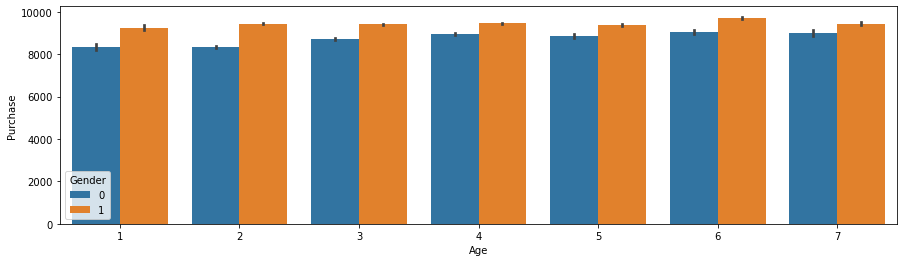

In [20]:
#Visualization of Purchase done by Male and Female based on Age Group
plt.figure(figsize=(15,4))
sns.barplot(x='Age',y='Purchase',hue='Gender',data= df_bf_final)

# Observations for Purchase visualization based on Age Group
    1. Men purchases more than Women
    2. Puchasing power increases with Age
    

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

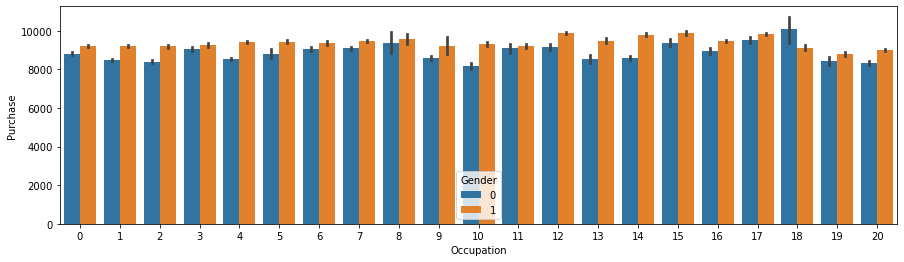

In [22]:
#Visualization of Purchase with Occupation based on Gender Group
plt.figure(figsize=(15,4))
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data= df_bf_final)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

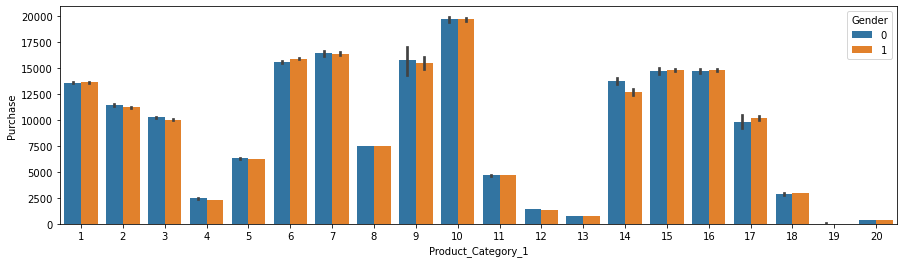

In [23]:
#Visualization of Purchase Cateogry1 with Purchase based on Gender Group
plt.figure(figsize=(15,4))
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data= df_bf_final)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

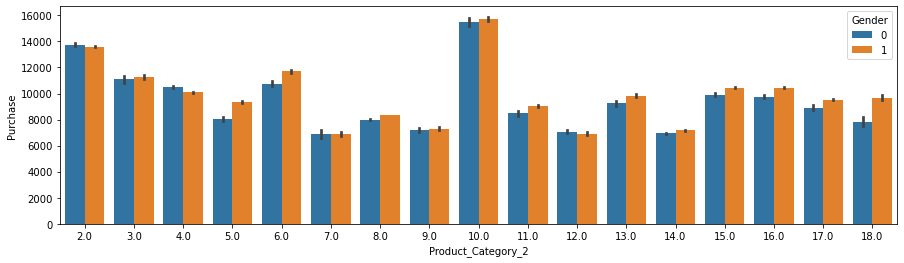

In [24]:
#Visualization of Purchase Cateogry2 with Purchase based on Gender Group
plt.figure(figsize=(15,4))
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data= df_bf_final)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

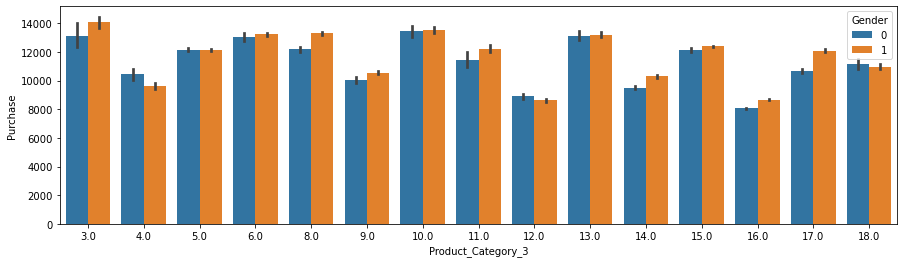

In [25]:
#Visualization of Purchase Cateogry3 with Purchase based on Gender Group
plt.figure(figsize=(15,4))
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data= df_bf_final)

# Observations for Purchase visualization based on Product Category
1. Product Category 1 sold more than Product Category 2 and 3
2. Women can be seen purchasing Product Category 2 more than Men

# Feature Scaling

In [35]:
#Since Product_ID is the only Object column in the dataset and not a necessay one, we will remove it
df_bf_final.drop(['Product_ID'], axis = 1, inplace= True)
df_bf_final

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,0,3,15,4,1,8,8.0,16.0,NaN,1,0
233595,0,3,15,4,1,5,8.0,16.0,NaN,1,0
233596,0,3,15,4,1,1,5.0,12.0,NaN,1,0
233597,0,5,1,4,0,10,16.0,16.0,NaN,0,1


In [53]:
# Step 2: Store all records which has Null in it
df_test1= df_bf_final[df_bf_final["Purchase"].isnull()]
df_test1

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,0,3,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,0,3,15,4,1,8,8.0,16.0,NaN,1,0
233595,0,3,15,4,1,5,8.0,16.0,NaN,1,0
233596,0,3,15,4,1,1,5.0,12.0,NaN,1,0
233597,0,5,1,4,0,10,16.0,16.0,NaN,0,1


In [59]:
# Step 3: Store all records which has Null in it
df_train= df_bf_final[~df_bf_final["Purchase"].isnull()]
df_train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,8.0,16.0,368.0,1,0
550064,0,3,1,3,0,20,8.0,16.0,371.0,0,1
550065,0,3,15,4,1,20,8.0,16.0,137.0,1,0
550066,0,7,1,2,0,20,8.0,16.0,365.0,0,1


In [60]:
# Step 4: Store Purchase column in data set Y 
Y = df_train['Purchase']
Y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [56]:
## Step 5: Store all columns from Training dataset except Purchase column in X dataset
X =df_train
X.drop(['Purchase'],axis=1,inplace= True)
X

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1
...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,8.0,16.0,1,0
550064,0,3,1,3,0,20,8.0,16.0,0,1
550065,0,3,15,4,1,20,8.0,16.0,1,0
550066,0,7,1,2,0,20,8.0,16.0,0,1


In [57]:
# Step 6: Ensure number of rows count is same in X and Y dataset
X.shape

(550068, 10)

In [61]:
Y.shape

(550068,)

In [63]:
# Split the data X and y into Training and Test data

# The Sklearn train_test_split function helps us create our training data and test data.
# This is because typically, the training data and test data come from the same original dataset.
# To get the data to build a model, we start with a single dataset, and then we split it into two datasets: train and test.

    from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.33,random_state=42)

In [64]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [66]:
X_train.shape

(368545, 10)

In [67]:
X_test.shape

(181523, 10)